In [1]:
# Imports
import matplotlib.pyplot as plt

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.plotting import MazePlot
import numpy as np



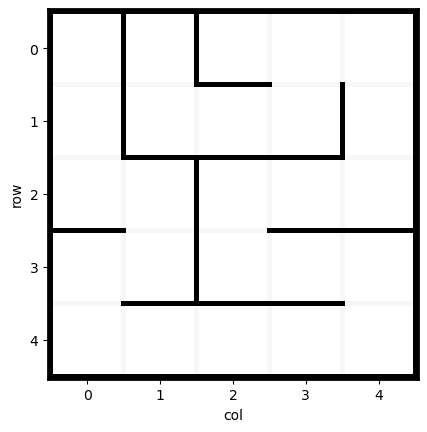

In [2]:
sample_lattice_maze = LatticeMazeGenerators.gen_dfs(
    grid_shape=(5, 5),
    lattice_dim=2,
    accessible_cells=None,
    max_tree_depth=None,
    start_coord=None,
)
down = sample_lattice_maze.connection_list[0]
MazePlot(sample_lattice_maze).plot()

plt.show()

In [3]:
import Maze_env.env.mazes as m

ex_env = m.maze_env(sample_lattice_maze,2,obs_type='basic')
ex_env.reset()
print(ex_env.agent_positions)


[7, 17]


In [4]:
import gymnasium as gym
num_agents = 2
spatial = []
env = gym.make('Maze_env/MazeRunner-v0',num_agents=num_agents,vision_len=7,maze=sample_lattice_maze,render_mode='human',
               obs_type = 'basic')
observations, info = env.reset()
#image = info['rgb']
local = info['local']
basic_local = info['spatial']
spatial.append(basic_local[0])
episode_over = False
while not episode_over:
    action = []
    for a in range(num_agents):
        action.append(env.action_space.sample())
    observations, reward,terminated, truncated,info = env.step(action)
    spatial.append(info['spatial'][0])
    episode_over = terminated or truncated

env.close()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


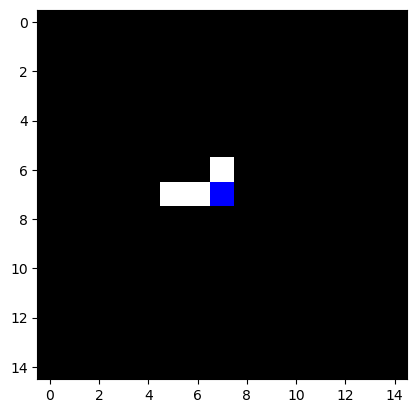

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def create_animation(image_sequence, interval=200):
    """
    Creates an animation from a sequence of images in a Jupyter Notebook.

    Args:
        image_sequence (list of numpy arrays): List of images (HxW or HxWxC).
        interval (int): Delay between frames in milliseconds.

    Returns:
        HTML: Animation rendered as an HTML object.
    """
    fig, ax = plt.subplots()

    # Show the first frame
    img_display = ax.imshow(image_sequence[0], cmap='gray', animated=True)

    def update(frame):
        """Updates the image for each frame."""
        img_display.set_array(image_sequence[frame])
        return img_display,

    # Create the animation
    anim = animation.FuncAnimation(fig, update, frames=len(image_sequence), interval=interval, blit=True)

    # Display animation as HTML in Jupyter Notebook
    return HTML(anim.to_jshtml())

# Example: Generate a sequence of random grayscale images
image_sequence = [np.random.rand(5, 5) for _ in range(10)]  # 10 frames

# Display animation in Jupyter Notebook
create_animation(spatial)


In [6]:
import numpy as np
x = [[1,2,3],[4,5,6]]

x = np.array(x).flatten().tolist()
print(x)


[1, 2, 3, 4, 5, 6]
